In [1]:
from google.colab import drive

drive.mount("/content/drive")
%cd '/content/drive/MyDrive/task4_materialType/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/task4_materialType


In [8]:


import numpy as np
import random
import cv2

def apply_gridmask(image, d1, d2, ratio):
    # Extract the image's dimensions
    height, width, channels = image.shape
    # Initialize an empty mask
    mask = np.zeros((height, width), dtype=np.uint8)
    # Generate random grid positions using list comprehensions
    grid_positions = [(i, j) for i in range(0, height, d1) for j in range(0, width, d2)]
    # Apply grid mask based on ratio using list comprehension
    mask_positions = [(x, y, min(x + d1, height), min(y + d2, width)) for x, y in grid_positions if random.random() < ratio]
    for x, y, x_end, y_end in mask_positions:
        mask[x:x_end, y:y_end] = 1
    # Expand the mask to match the image's dimensions
    mask = np.expand_dims(mask, axis=-1)
    # Apply the mask to the original image and add random colors
    masked_image = image * (1 - mask) + mask * np.random.rand(height, width, channels) * 255

    return masked_image.astype(np.uint8)














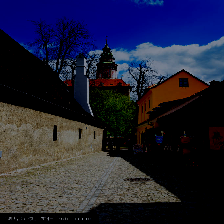

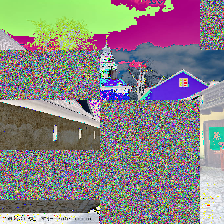

In [10]:
import numpy as np
from google.colab.patches import cv2_imshow

# Load an example image
# Load the .npy file
data = np.load("./DDD/data/task4_X_train.npy")



# Load the .npy file
#data = np.load("your_data.npy")

# Assuming the data contains images stacked along the first dimension
first_image = data[1]

# Define GridMask parameters
d1 = 50  # Grid size parameter 1
d2 = 100  # Grid size parameter 2
ratio = 0.5  # Ratio of grid to image size

# Apply GridMask augmentation to the first image
augmented_image = apply_gridmask(first_image, d1, d2, ratio)

# Display the original and augmented images using cv2_imshow()
cv2_imshow(first_image)
cv2_imshow(augmented_image)

